In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [12]:
print("Current Version:", tf.__version__)
print("Executing eagerly" if tf.executing_eagerly() else "Not eager")
print("GPU available" if tf.config.list_physical_devices('GPU') else "GPU Nai")

Current Version: 2.2.0
Executing eagerly
GPU Nai


In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
(Train_images, train_labels), (Test_images, test_labels) = fashion_mnist.load_data()
print("Dataset loaded")

4423680/4422102 [==============================] - 0s 0us/step
Dataset loaded


In [14]:
type(fashion_mnist)

module

In [23]:
Train_images.shape == X_train.shape and train_labels.shape == y_train.shape \
and Test_images.shape == X_test.shape and test_labels.shape == y_test.shape

True

In [24]:
Train_images.shape

(60000, 28, 28)

In [25]:
train_labels.shape

(60000,)

In [26]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
len(train_labels)

60000

In [30]:
print(np.min(train_labels))
print(np.max(train_labels))

0
9


In [31]:
print("Train label {} for this image".format(train_labels[0]))
Train_images[0]

Train label 9 for this image


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [36]:
class_names = [
               "T shirt",
               "Trouser",
               "Pullover/Hoodie",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle Boot"

]

In [48]:
def plotter(_image):
  plt.figure()
  plt.imshow(_image)
  plt.colorbar()
  plt.grid(True)
  #plt.xlabel(class_names[test_labels[0]], color = 'red'#)
  plt.show()
  

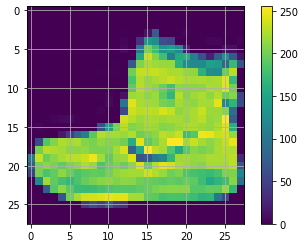

In [49]:
plotter(Train_images[0])

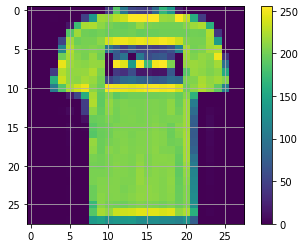

In [50]:
plotter(Train_images[1])

In [53]:
class_names[train_labels[1]]

'T shirt'

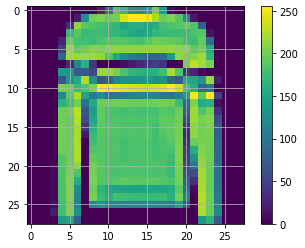

In [52]:
i = -1
while True:
  i += 1
  if(train_labels[i] == 2):
    plotter(Train_images[i])
    break

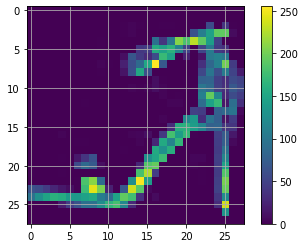

In [54]:
i = -1
while True:
  i += 1
  if(class_names[train_labels[i]] == "Sandal"):
    plotter(Train_images[i])
    break

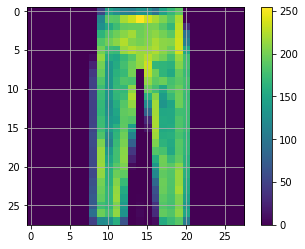

In [55]:
i = -1
while True:
  i += 1
  if(class_names[train_labels[i]] == "Trouser"):
    plotter(Train_images[i])
    break

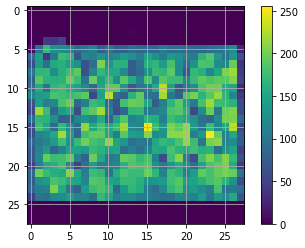

In [56]:
i = -1
while True:
  i += 1
  if(class_names[train_labels[i]] == "Bag"):
    plotter(Train_images[i])
    break

This is Ankle Boot


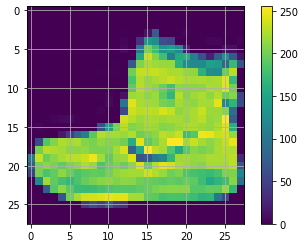

This is T shirt


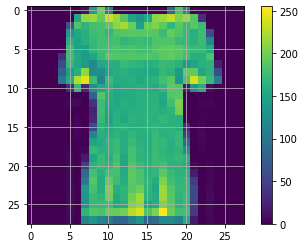

This is Sandal


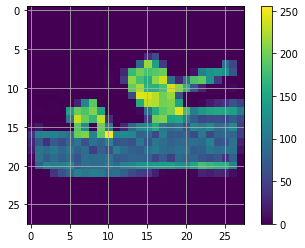

This is Sneaker


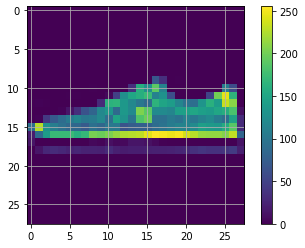

This is Trouser


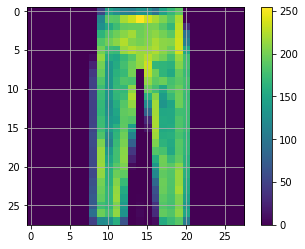

This is Shirt


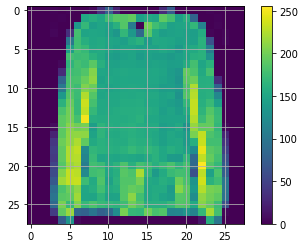

This is Coat


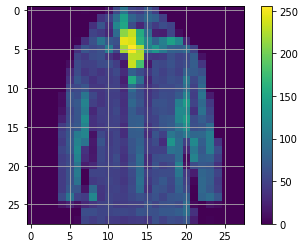

This is Dress


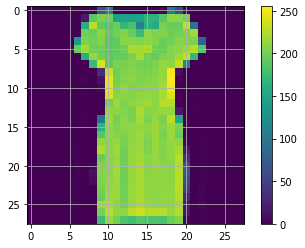

This is Bag


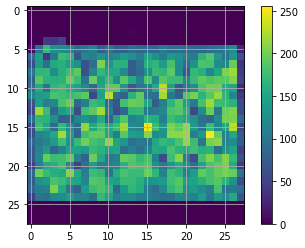

This is Pullover/Hoodie


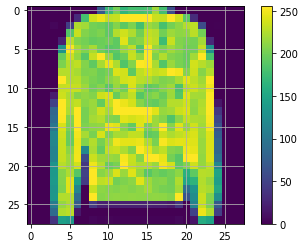

In [77]:
myMap = dict()
#myMap.clear()#
#print(len(myMap))
i = -1
while True:
  i += 1
  if(class_names[train_labels[i]] not in myMap):
    print("This is", class_names[train_labels[i]])
    plotter(Train_images[i])
    myMap[class_names[train_labels[i]]] = 1
    breakable = True
    for i in range(0, 10):
      if(class_names[i] not in myMap):
        breakable = False
    if(breakable):
      break
#print(len(myMap))  

In [79]:
np.max(Train_images)

255

In [81]:
Train_images = Train_images / 255.0
Test_images = Test_images / 255.0

In [82]:
print(Train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [83]:
np.max(Train_images)

1.0

In [86]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape = (28, 28)),
      keras.layers.Dense(units = 128, activation='relu'),
      keras.layers.Dense(units = 10, activation='softmax')
])

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


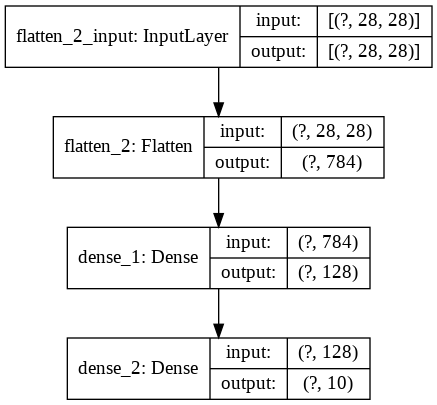

In [127]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

In [88]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
model.fit(Train_images, train_labels, epochs=11, batch_size=6)

Epoch 1/11
10000/10000 [==============================] - 14s 1ms/step - loss: 0.4821 - accuracy: 0.8267
Epoch 2/11
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3696 - accuracy: 0.8653
Epoch 3/11
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3364 - accuracy: 0.8774
Epoch 4/11
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3158 - accuracy: 0.8836
Epoch 5/11
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3017 - accuracy: 0.8881
Epoch 6/11
10000/10000 [==============================] - 14s 1ms/step - loss: 0.2889 - accuracy: 0.8942
Epoch 7/11
10000/10000 [==============================] - 14s 1ms/step - loss: 0.2761 - accuracy: 0.8975
Epoch 8/11
10000/10000 [==============================] - 15s 1ms/step - loss: 0.2685 - accuracy: 0.9000
Epoch 9/11
10000/10000 [==============================] - 14s 1ms/step - loss: 0.2592 - accuracy: 0.9034
Epoch 10/11
10000/10000 [==============================

In [90]:
test_loss, test_accuracy = model.evaluate(Test_images, test_labels)
print(test_loss, test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8851
0.36759045720100403 0.8851000070571899


In [94]:
prediction = model.predict(Test_images)

In [97]:
print(prediction[0])
print(np.argmax(prediction[0]))

[2.6817778e-23 1.6863758e-24 1.4795931e-26 1.4574849e-30 3.6480712e-26
 1.9208251e-06 2.5770887e-19 2.4671695e-04 2.5781959e-22 9.9975139e-01]
9


In [116]:
def prediction_val(index_in_test):
  #pred_val = np.argmax(model.predict(Test_images[index_in_test]))
  pred_val = np.argmax(prediction[index_in_test])
  if pred_val == test_labels[index_in_test]:
    print("Well predicted! This is {}".format(class_names[test_labels[index_in_test]]))
    return True
  else:
    print("Mispredicted! Expected: {} Model claimed: {}"\
        .format(class_names[test_labels[index_in_test]], class_names[pred_val]))
    return False

In [117]:
xx = prediction_val(0)
print(xx)

Well predicted! This is Ankle Boot
True


In [118]:
prediction_val(111)

Well predicted! This is Sandal


True

In [ ]:
good = bad = 0

for i in range (len(test_labels)):
  xx = prediction_val(i)
  if(xx):
    good += 1
  else:
    bad += 1;

print(good, bad, good+bad)

[[8.9697828e-18 1.0000000e+00 4.2473978e-26 4.7734715e-12 4.5916243e-17
  5.7039868e-30 7.8049195e-19 1.0752563e-31 3.9122557e-20 1.4783410e-34]]
1


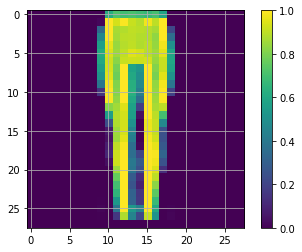

In [126]:
single_pred = model.predict(np.expand_dims(Test_images[777], 0))
print(single_pred)
print(np.argmax(single_pred))
plotter(Test_images[777])

In [162]:
def PlotterExt(index, prediction_ara, true_label):

  claimed_label = np.argmax(prediction[index])
  maxval = np.max(prediction[index])
  _image = Test_images[index]

  if (claimed_label == true_label):
    _color = 'blue'
  else:
    _color = 'red'


  plt.figure()
  plt.imshow(_image)
  plt.colorbar()
  plt.grid(True)
  plt.xlabel((class_names[test_labels[0]], 100*maxval, class_names[true_label]),color = _color)
  plt.show()


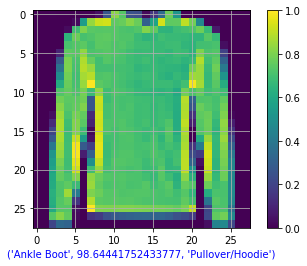

In [163]:
pred_ara_to_pass = model.predict(np.expand_dims(Test_images[55], 0))
PlotterExt(55, pred_ara_to_pass, test_labels[55])